First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1

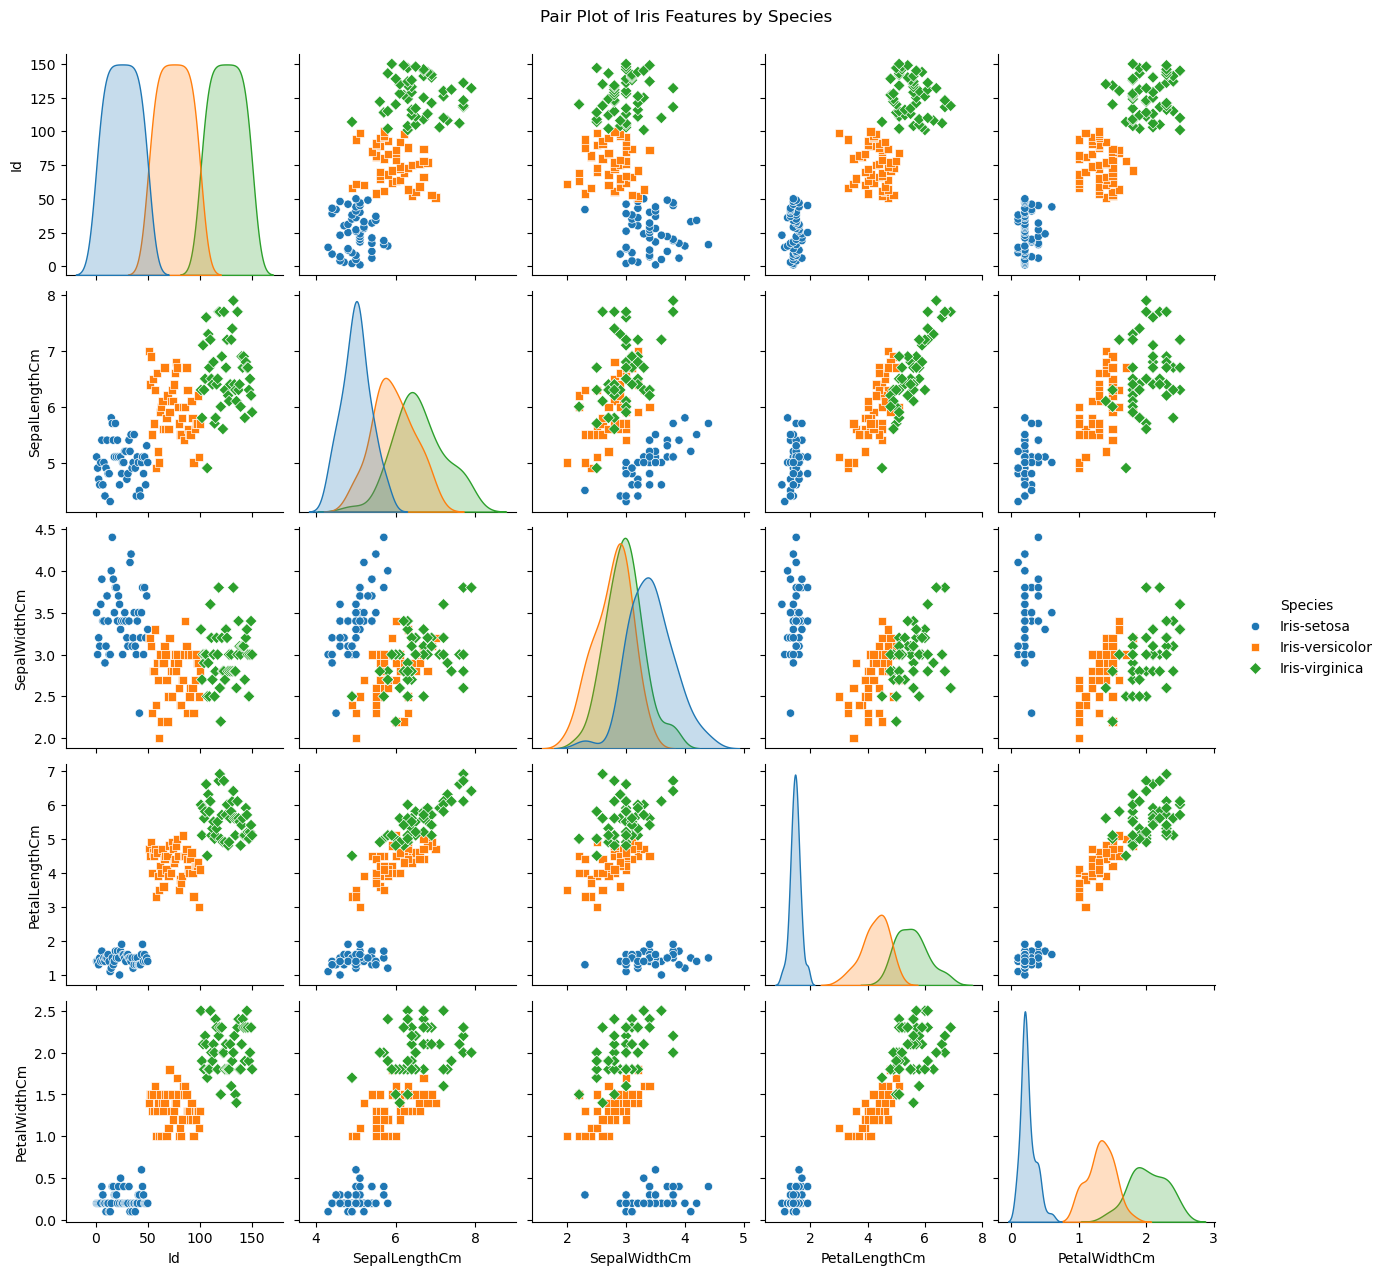


--- Model Evaluation (K-Nearest Neighbors) ---
Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


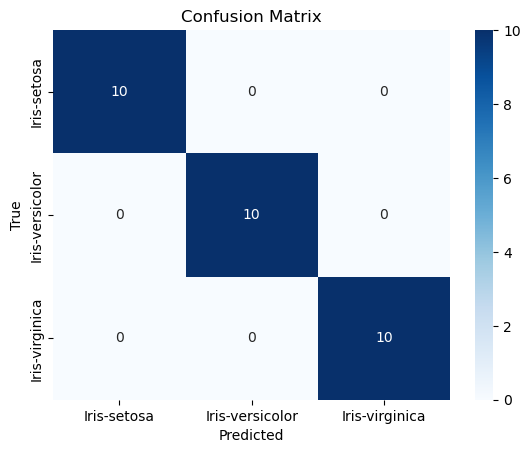


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("C:\\Users\\adapa\\Downloads\\Iris.csv")
except FileNotFoundError:
    print("Error: Iris.csv not found. Please check the file path.")
    exit()
    
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features by Species", y=1.02)
plt.show()

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

le = LabelEncoder()
y_encoded = le.fit_transform(y) # Now Species will be 0, 1, 2


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

knn_model = KNeighborsClassifier(n_neighbors=5) # You can experiment with 'n_neighbors'
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("\n--- Model Evaluation (K-Nearest Neighbors) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))